<a href="https://colab.research.google.com/github/wingscode123/ibm-skillsbuild-football-analysis-2024-2025/blob/main/Capstone_Project_Notebook_IBM_Skillsbuild_Data_Radithya_Fawwaz_Aydin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

⚽ **Football Matches 2024–2025 Analysis**  
*Capstone Project – Data Classification and Summarization Using IBM Granite*  

---

**Notebook Overview**  
This notebook analyzes **1,941 football matches** from the 2024–2025 season using both **Exploratory Data Analysis (EDA)** and **AI-powered summarization** (IBM Granite via Replicate API).  
The analysis aims to uncover **patterns in match outcomes, team performance, and temporal trends**, then translate them into **insights & actionable recommendations**.  

**Objectives**  
- Perform **EDA** to explore match results, goals, team strengths, and time-based patterns.  
- Use **IBM Granite LLM** to generate concise **analytical summaries, insights, and recommendations**.  
- Demonstrate the use of **AI for sports analytics**, bridging raw statistics with decision-making narratives.  

**Workflow**  
1. **Data Preparation**  
   - Load and clean the dataset  
   - Handle missing values  
   - Standardize datetime (convert UTC → Asia/Jakarta)  

2. **Exploratory Data Analysis**  
   - Match outcomes & goal distribution  
   - Team performance (points, goals scored, goals conceded)  
   - Time & trend analysis (monthly, weekday, hourly patterns)  

3. **AI-Powered Summarization**  
   - Use IBM Granite (via Replicate) for:  
     - Analytical Results  
     - Insight & Findings  
     - Recommendations  

4. **Visualization**  
   - Charts for each analytical result (pie, bar, histogram, line)  

5. **Final Output**  
   - Consolidated **Analytical Result, Insights, Recommendations**  
   - To be integrated into GitHub README and presentation slides  

---

**Expected Deliverables**  
- Notebook with full analysis and AI-generated insights  
- README.md summarizing project, dataset, insights, and AI role  
- Presentation slides with visuals and recommendations  

---

👨‍💻 *Author: Radithya Fawwaz Aydin*  
🔗 *Student of IBM SkillsBuild Data Classification and Summarization Using IBM Granite*  

# Install Library & Setup API

In [69]:
!pip install langchain_community
!pip install replicate

In [70]:
from google.colab import userdata
import os

# ambil token dari colab
api_token = userdata.get('api_token')

# taro token ke env. var.
os.environ['REPLICATE_API_TOKEN'] = api_token

In [71]:
from langchain_community.llms import Replicate

# Ambil granite dari replicate
llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct"
)

In [72]:
!pip install pandas
!pip install -U langchain langchain-community langchain-experimental replicate

# Import Library & Cleaning Dataset

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
import pandas as pd

df = pd.read_csv("football_matches_2024_2025.csv")
df.head()

,competition_code,competition_name,season,match_id,matchday,stage,status,date_utc,referee,home_team_id,...,fulltime_home,fulltime_away,halftime_home,halftime_away,goal_difference,total_goals,match_outcome,home_points,away_points,date_local_africa_cairo
0,PL,Premier League,2024/2025,497410,1,REGULAR_SEASON,FINISHED,2024-08-16 19:00:00+00:00,Robert Jones,66,...,1,0,0.0,0.0,1,1,Home Win,3,0,2024-08-16 22:00
1,PL,Premier League,2024/2025,497411,1,REGULAR_SEASON,FINISHED,2024-08-17 11:30:00+00:00,Tim Robinson,349,...,0,2,0.0,0.0,-2,2,Away Win,0,3,2024-08-17 14:30
2,PL,Premier League,2024/2025,497412,1,REGULAR_SEASON,FINISHED,2024-08-17 14:00:00+00:00,Jarred Gillett,57,...,2,0,1.0,0.0,2,2,Home Win,3,0,2024-08-17 17:00
3,PL,Premier League,2024/2025,497413,1,REGULAR_SEASON,FINISHED,2024-08-17 14:00:00+00:00,Simon Hooper,62,...,0,3,0.0,1.0,-3,3,Away Win,0,3,2024-08-17 17:00
4,PL,Premier League,2024/2025,497414,1,REGULAR_SEASON,FINISHED,2024-08-17 14:00:00+00:00,Craig Pawson,67,...,1,0,1.0,0.0,1,1,Home Win,3,0,2024-08-17 17:00


In [75]:
# Cek info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   competition_code         1941 non-null   object 
 1   competition_name         1941 non-null   object 
 2   season                   1941 non-null   object 
 3   match_id                 1941 non-null   int64  
 4   matchday                 1941 non-null   int64  
 5   stage                    1941 non-null   object 
 6   status                   1941 non-null   object 
 7   date_utc                 1941 non-null   object 
 8   referee                  1938 non-null   object 
 9   home_team_id             1941 non-null   int64  
 10  home_team                1941 non-null   object 
 11  away_team_id             1941 non-null   int64  
 12  away_team                1941 non-null   object 
 13  fulltime_home            1941 non-null   int64  
 14  fulltime_away           

In [76]:
# Lihat jumlah missing values per kolom
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
competition_code           0
competition_name           0
season                     0
match_id                   0
matchday                   0
stage                      0
status                     0
date_utc                   0
referee                    3
home_team_id               0
home_team                  0
away_team_id               0
away_team                  0
fulltime_home              0
fulltime_away              0
halftime_home              1
halftime_away              1
goal_difference            0
total_goals                0
match_outcome              0
home_points                0
away_points                0
date_local_africa_cairo    0
dtype: int64


In [77]:
# 1. Isi referee kosong dengan "Unknown"
df['referee'].fillna("Unknown", inplace=True)

# 2. Isi halftime score yang kosong dengan median
df['halftime_home'].fillna(df['halftime_home'].median(), inplace=True)
df['halftime_away'].fillna(df['halftime_away'].median(), inplace=True)

# Cek ulang hasil cleaning
print("Missing values setelah cleaning:")
print(df.isnull().sum())

Missing values setelah cleaning:
competition_code           0
competition_name           0
season                     0
match_id                   0
matchday                   0
stage                      0
status                     0
date_utc                   0
referee                    0
home_team_id               0
home_team                  0
away_team_id               0
away_team                  0
fulltime_home              0
fulltime_away              0
halftime_home              0
halftime_away              0
goal_difference            0
total_goals                0
match_outcome              0
home_points                0
away_points                0
date_local_africa_cairo    0
dtype: int64


/tmp/ipython-input-3443901023.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['referee'].fillna("Unknown", inplace=True)
/tmp/ipython-input-3443901023.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

Setelah dicek, ternyata ada 3 data di referee, dan masing-masing 1 data kolom di haltime_home & halftime_away

In [78]:
# Cek duplikasi
print("\nJumlah duplikasi:", df.duplicated().sum())


Jumlah duplikasi: 0


tidak ada kolom yang data nya terduplikat

In [79]:
# Konversi kolom tanggal ke datetime
df['date_utc'] = pd.to_datetime(df['date_utc'], errors='coerce', utc=True)

In [80]:
# Cek kolom yang tersedia dulu (opsional, untuk verifikasi)
print(df.columns.tolist())

# Pastikan date_utc bertipe datetime & punya tz UTC
if not pd.api.types.is_datetime64tz_dtype(df['date_utc']):
    df['date_utc'] = pd.to_datetime(df['date_utc'], utc=True, errors='coerce')

# Buat kolom waktu lokal Jakarta langsung dari UTC
df['date_local'] = df['date_utc'].dt.tz_convert('Asia/Jakarta')

# Hapus kolom Cairo hanya jika masih ada supaya tidak KeyError
if 'date_local_africa_cairo' in df.columns:
    df.drop(columns=['date_local_africa_cairo'], inplace=True)

# Cek hasil
df[['date_utc', 'date_local']].head()


['competition_code', 'competition_name', 'season', 'match_id', 'matchday', 'stage', 'status', 'date_utc', 'referee', 'home_team_id', 'home_team', 'away_team_id', 'away_team', 'fulltime_home', 'fulltime_away', 'halftime_home', 'halftime_away', 'goal_difference', 'total_goals', 'match_outcome', 'home_points', 'away_points', 'date_local_africa_cairo']


/tmp/ipython-input-3147488485.py:5: DeprecationWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if not pd.api.types.is_datetime64tz_dtype(df['date_utc']):


,date_utc,date_local
0,2024-08-16 19:00:00+00:00,2024-08-17 02:00:00+07:00
1,2024-08-17 11:30:00+00:00,2024-08-17 18:30:00+07:00
2,2024-08-17 14:00:00+00:00,2024-08-17 21:00:00+07:00
3,2024-08-17 14:00:00+00:00,2024-08-17 21:00:00+07:00
4,2024-08-17 14:00:00+00:00,2024-08-17 21:00:00+07:00


In [81]:
# Bersihkan nama tim (hapus spasi berlebih)
df['home_team'] = df['home_team'].str.strip()
df['away_team'] = df['away_team'].str.strip()

# Lowercase semua (opsional)
df['home_team'] = df['home_team'].str.lower()
df['away_team'] = df['away_team'].str.lower()

In [82]:
# Memastikan tipe data angka
numeric_cols = ['fulltime_home', 'fulltime_away', 'halftime_home', 'halftime_away',
                'goal_difference', 'total_goals', 'home_points', 'away_points']

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [83]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype                       
---  ------            --------------  -----                       
 0   competition_code  1941 non-null   object                      
 1   competition_name  1941 non-null   object                      
 2   season            1941 non-null   object                      
 3   match_id          1941 non-null   int64                       
 4   matchday          1941 non-null   int64                       
 5   stage             1941 non-null   object                      
 6   status            1941 non-null   object                      
 7   date_utc          1941 non-null   datetime64[ns, UTC]         
 8   referee           1941 non-null   object                      
 9   home_team_id      1941 non-null   int64                       
 10  home_team         1941 non-null   object                      
 11  away

,competition_code,competition_name,season,match_id,matchday,stage,status,date_utc,referee,home_team_id,...,fulltime_home,fulltime_away,halftime_home,halftime_away,goal_difference,total_goals,match_outcome,home_points,away_points,date_local
0,PL,Premier League,2024/2025,497410,1,REGULAR_SEASON,FINISHED,2024-08-16 19:00:00+00:00,Robert Jones,66,...,1,0,0.0,0.0,1,1,Home Win,3,0,2024-08-17 02:00:00+07:00
1,PL,Premier League,2024/2025,497411,1,REGULAR_SEASON,FINISHED,2024-08-17 11:30:00+00:00,Tim Robinson,349,...,0,2,0.0,0.0,-2,2,Away Win,0,3,2024-08-17 18:30:00+07:00
2,PL,Premier League,2024/2025,497412,1,REGULAR_SEASON,FINISHED,2024-08-17 14:00:00+00:00,Jarred Gillett,57,...,2,0,1.0,0.0,2,2,Home Win,3,0,2024-08-17 21:00:00+07:00
3,PL,Premier League,2024/2025,497413,1,REGULAR_SEASON,FINISHED,2024-08-17 14:00:00+00:00,Simon Hooper,62,...,0,3,0.0,1.0,-3,3,Away Win,0,3,2024-08-17 21:00:00+07:00
4,PL,Premier League,2024/2025,497414,1,REGULAR_SEASON,FINISHED,2024-08-17 14:00:00+00:00,Craig Pawson,67,...,1,0,1.0,0.0,1,1,Home Win,3,0,2024-08-17 21:00:00+07:00


# EDA

In [84]:
# === Prepare EDA summary khusus Pertandingan ===
eda_match_summary = {
    "n_matches": len(df),
    "outcome_counts": df['match_outcome'].value_counts().to_dict(),
    "outcome_percent": (df['match_outcome'].value_counts(normalize=True)*100).round(2).to_dict(),
    "avg_goals_total": round(df['total_goals'].mean(), 3),
    "avg_goals_home": round(df['fulltime_home'].mean(), 3),
    "avg_goals_away": round(df['fulltime_away'].mean(), 3),
    "goal_difference_stats": {
        "min": int(df['goal_difference'].min()),
        "median": float(df['goal_difference'].median()),
        "max": int(df['goal_difference'].max()),
        "mean": float(df['goal_difference'].mean()),
        "std": float(df['goal_difference'].std())
    }
}

# === Prompt ke Granite (fokus analisis pertandingan) ===
prompt_match = f"""
You are a sports data analyst.
Analyze the football match statistics below and produce three sections:

1) Analytical Result — summarize key numbers and distributions.
2) Insight & Findings — highlight 5–8 patterns about match outcomes, goals, and margins.
3) Recommendations — 3–5 actionable suggestions for coaches or analysts.

Rules:
- Be concise but numeric (cite exact values and percentages).
- Focus ONLY on match-level outcomes and scoring patterns.
- Avoid team-specific or time-trend insights here.

MATCH EDA SUMMARY (JSON):
{eda_match_summary}
"""

analysis_match = llm.invoke(prompt_match)
print(analysis_match)

1) Analytical Result:
- Total matches analyzed: 1941
- Home wins: 832 (42.86%)
- Away wins: 646 (33.28%)
- Draws: 463 (23.85%)
- Average total goals per match: 2.88
- Average goals scored by home teams: 1.54
- Average goals scored by away teams: 1.34
- Goal difference statistics: 
  - Min: -6
  - Median: 0
  - Max: 8
  - Mean: 0.196
  - Standard Deviation: 1.881

2) Insight & Findings:
- Home teams win approximately 43% of the matches, indicating a slight home-field advantage.
- Away teams secure wins in 33% of the matches, suggesting a relatively balanced competition.
- Draws occur in about 24% of the games, highlighting the importance of defensive strategies.
- The average total goals per match is 2.88, suggesting a generally low-scoring environment.
- Home teams tend to score slightly more (1.54 goals on average) compared to away teams (1.34 goals).
- The goal difference mean is close to zero (0.196), indicating that, on average, home teams barely outscore away teams.
- The high sta

In [85]:
# --- CETAK DAFTAR TOP 10 (oleh Python, bukan LLM) ---
print("## Analytical Result — Lists (computed in Python)\n")
print("Top 10 by Points:")
for i, (team, val) in enumerate(top_points.items(), start=1):
    print(f"{i}. {team} — {val} points")

print("\nTop 10 by Goals Scored:")
for i, (team, val) in enumerate(top_scored.items(), start=1):
    print(f"{i}. {team} — {val} goals")

print("\nTop 10 by Fewest Goals Conceded:")
for i, (team, val) in enumerate(fewest_conceded.items(), start=1):
    print(f"{i}. {team} — {val} goals conceded")

# --- PROMPT GRANITE: ringkas Analytical Result + Insights + Recos ---
from langchain_community.llms import Replicate
llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
    model_kwargs={"temperature": 0.2, "top_p": 0.9, "max_new_tokens": 700}
)

prompt_team_hybrid = f"""
You are a football performance analyst.

You are given THREE finalized lists (already printed above by Python and repeated here).
Do NOT re-list all items. Instead:
- Write a SHORT Analytical Result (3–5 bullets) highlighting key takeaways ONLY (leaders, notable gaps, outliers).
- Then write Insight & Findings (5–8 bullets, ≤25 words each, numeric & comparative).
- Then write Recommendations (3–5 actionable bullets grounded in the data).

Use ONLY the values shown below. Be precise and concise. No other text before/after the three sections.

Top 10 by Points:
{top_points_md}

Top 10 by Goals Scored:
{top_scored_md}

Top 10 by Fewest Goals Conceded:
{fewest_conceded_md}

FORMAT TO OUTPUT:

## Analytical Result
- ...

## Insight & Findings
- ...

## Recommendations
- ...
"""

print()
print(llm.invoke(prompt_team_hybrid))

## Analytical Result — Lists (computed in Python)

Top 10 by Points:
1. paris saint-germain fc — 118 points
2. fc barcelona — 117 points
3. fc internazionale milano — 114 points
4. real madrid cf — 111 points
5. fc bayern münchen — 108 points
6. liverpool fc — 108 points
7. arsenal fc — 103 points
8. club atlético de madrid — 94 points
9. aston villa fc — 91 points
10. atalanta bc — 89 points

Top 10 by Goals Scored:
1. fc barcelona — 145 goals
2. paris saint-germain fc — 134 goals
3. fc bayern münchen — 130 goals
4. real madrid cf — 111 goals
5. fc internazionale milano — 105 goals
6. liverpool fc — 105 goals
7. borussia dortmund — 102 goals
8. arsenal fc — 100 goals
9. atalanta bc — 100 goals
10. manchester city fc — 93 goals

Top 10 by Fewest Goals Conceded:
1. sk sturm graz — 14 goals conceded
2. sporting clube de portugal — 15 goals conceded
3. fk shakhtar donetsk — 16 goals conceded
4. celtic fc — 17 goals conceded
5. gnk dinamo zagreb — 19 goals conceded
6. sport lisboa e benfic

In [86]:
# === EDA summary khusus Waktu & Tren ===

# 1) Distribusi pertandingan per bulan
matches_per_month = df['date_local'].dt.to_period('M').value_counts().sort_index()
goals_per_month = df.groupby(df['date_local'].dt.to_period('M'))['total_goals'].mean().round(2)

# 2) Distribusi hari dalam seminggu
matches_per_day = df['date_local'].dt.day_name().value_counts()
avg_goals_per_day = df.groupby(df['date_local'].dt.day_name())['total_goals'].mean().round(2)

# 3) Distribusi jam pertandingan
matches_per_hour = df['date_local'].dt.hour.value_counts().sort_index()
avg_goals_per_hour = df.groupby(df['date_local'].dt.hour)['total_goals'].mean().round(2)

# Siapkan summary ringkas
eda_time_summary = {
    "matches_per_month": matches_per_month.to_dict(),
    "avg_goals_per_month": goals_per_month.to_dict(),
    "matches_per_day": matches_per_day.to_dict(),
    "avg_goals_per_day": avg_goals_per_day.to_dict(),
    "matches_per_hour": matches_per_hour.to_dict(),
    "avg_goals_per_hour": avg_goals_per_hour.to_dict()
}

# === Prompt ke Granite (fokus waktu & tren) ===
prompt_time_v2 = f"""
You are a football data analyst.

Analyze the following time-based match statistics (monthly, weekday, hourly).
Do not list every single period. Instead, summarize with key highlights.

## Analytical Result
- Provide a concise summary of trends:
  * Which months had the highest/lowest matches and goals.
  * Which weekdays stood out.
  * Which hours are peak vs low activity.
- Use max 5 bullet points.

## Insight & Findings
- Write 5–7 bullets.
- Highlight patterns (e.g., weekend dominance, midweek surprises, goal peaks by time-of-day).
- Each bullet ≤ 25 words.
- Be numeric (include values, averages, percentages where relevant).

## Recommendations
- Give 3–5 actionable suggestions (scheduling, training, fan engagement, broadcasting).
- Tie each suggestion to a specific temporal pattern.

Rules:
- Focus ONLY on time & temporal trends (ignore teams or outcomes).
- Do not output partial lists.
- Keep answer under 300 words.

TIME & TREND EDA SUMMARY (JSON):
{eda_time_summary}
"""

analysis_time_v2 = llm.invoke(prompt_time_v2)
print(analysis_time_v2)

/tmp/ipython-input-3915383518.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  matches_per_month = df['date_local'].dt.to_period('M').value_counts().sort_index()
/tmp/ipython-input-3915383518.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  goals_per_month = df.groupby(df['date_local'].dt.to_period('M'))['total_goals'].mean().round(2)


## Analytical Result

- **Highest matches**: December 2025 (225), September 2024 (197)
- **Lowest matches**: March 2025 (183)
- **Highest goals**: June 2025 (5.0 on average per match)
- **Lowest goals**: August 2024 (2.7 on average per match)
- **Peak activity**: 21:00 - 22:00 (highest matches and goals)

## Insight & Findings

- Weekends (Sunday, Saturday) dominate matches (702 and 639 respectively).
- Fridays have the lowest average goals (2.48).
- June 2025 stands out with an unusually high average goals per match (5.0).
- Midweek (Wednesday) has the lowest match count (125).
- Hours 21 and 22 have the highest match counts, indicating evening kick-offs are popular.

## Recommendations

- **Schedule more weekend matches** to capitalize on higher fan attendance.
- **Consider midweek adjustments**: Explore increasing matches on Wednesdays to balance the schedule.
- **Evening kick-offs strategy**: Maintain popularity by scheduling more matches during peak hours (21:00 - 22:00).
- **Broa

# Output
● Analytical result

● Insight & findings

● Recommendations

## Analytical Result + Visualization

/tmp/ipython-input-1372077050.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Home','Away'], y=[avg_home_goals, avg_away_goals], palette='Set2')


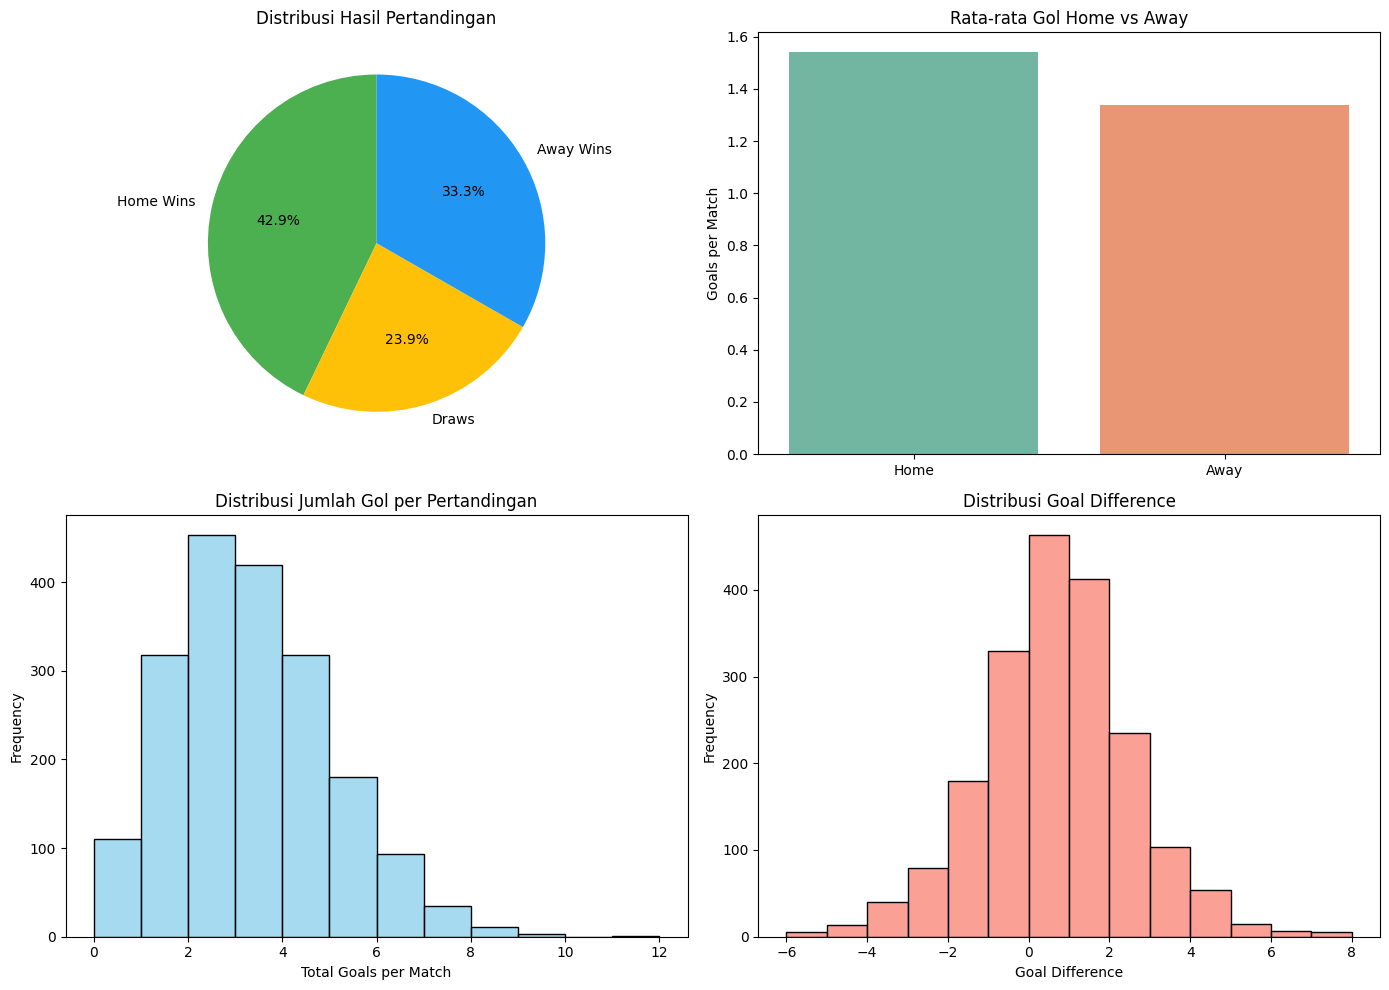

📊 Analytical Result — Pertandingan
Total matches analyzed: 1941
Home wins: 832 (42.86%)
Away wins: 646 (33.28%)
Draws: 463 (23.85%)
Average total goals per match: 2.88
Average home goals: 1.54, Average away goals: 1.34
Goal difference stats: {'min': -6, 'median': 0, 'max': 8, 'mean': 0.2, 'std': 1.88}


In [87]:
# ==== Angka ringkasan (dari hasil analisis) ====
total_matches = 1941
home_wins = 832
away_wins = 646
draws = 463
avg_total_goals = 2.88
avg_home_goals = 1.54
avg_away_goals = 1.34
gd_stats = {"min": -6, "median": 0, "max": 8, "mean": 0.20, "std": 1.88}

# ==== 1. Pie chart distribusi hasil pertandingan ====
plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
plt.pie([home_wins, draws, away_wins],
        labels=['Home Wins','Draws','Away Wins'],
        autopct='%1.1f%%', startangle=90, colors=['#4CAF50','#FFC107','#2196F3'])
plt.title("Distribusi Hasil Pertandingan")

# ==== 2. Bar chart rata-rata gol home vs away ====
plt.subplot(2,2,2)
sns.barplot(x=['Home','Away'], y=[avg_home_goals, avg_away_goals], palette='Set2')
plt.title("Rata-rata Gol Home vs Away")
plt.ylabel("Goals per Match")

# ==== 3. Histogram distribusi total gol ====
plt.subplot(2,2,3)
sns.histplot(df['total_goals'], bins=range(0, df['total_goals'].max()+2), kde=False, color='skyblue')
plt.title("Distribusi Jumlah Gol per Pertandingan")
plt.xlabel("Total Goals per Match")
plt.ylabel("Frequency")

# ==== 4. Histogram distribusi goal difference ====
plt.subplot(2,2,4)
sns.histplot(df['goal_difference'], bins=range(df['goal_difference'].min(), df['goal_difference'].max()+1), kde=False, color='salmon')
plt.title("Distribusi Goal Difference")
plt.xlabel("Goal Difference")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# ==== Cetak summary angka ====
print("📊 Analytical Result — Pertandingan")
print(f"Total matches analyzed: {total_matches}")
print(f"Home wins: {home_wins} ({home_wins/total_matches*100:.2f}%)")
print(f"Away wins: {away_wins} ({away_wins/total_matches*100:.2f}%)")
print(f"Draws: {draws} ({draws/total_matches*100:.2f}%)")
print(f"Average total goals per match: {avg_total_goals}")
print(f"Average home goals: {avg_home_goals}, Average away goals: {avg_away_goals}")
print(f"Goal difference stats: {gd_stats}")

/tmp/ipython-input-3634118596.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(points_data.values()), y=list(points_data.keys()), palette="Blues_d")
/tmp/ipython-input-3634118596.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(goals_scored_data.values()), y=list(goals_scored_data.keys()), palette="Greens_d")
/tmp/ipython-input-3634118596.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(fewest_conceded_data.values()), y=list(fewest_conceded_data.keys()), palette="Reds_d")


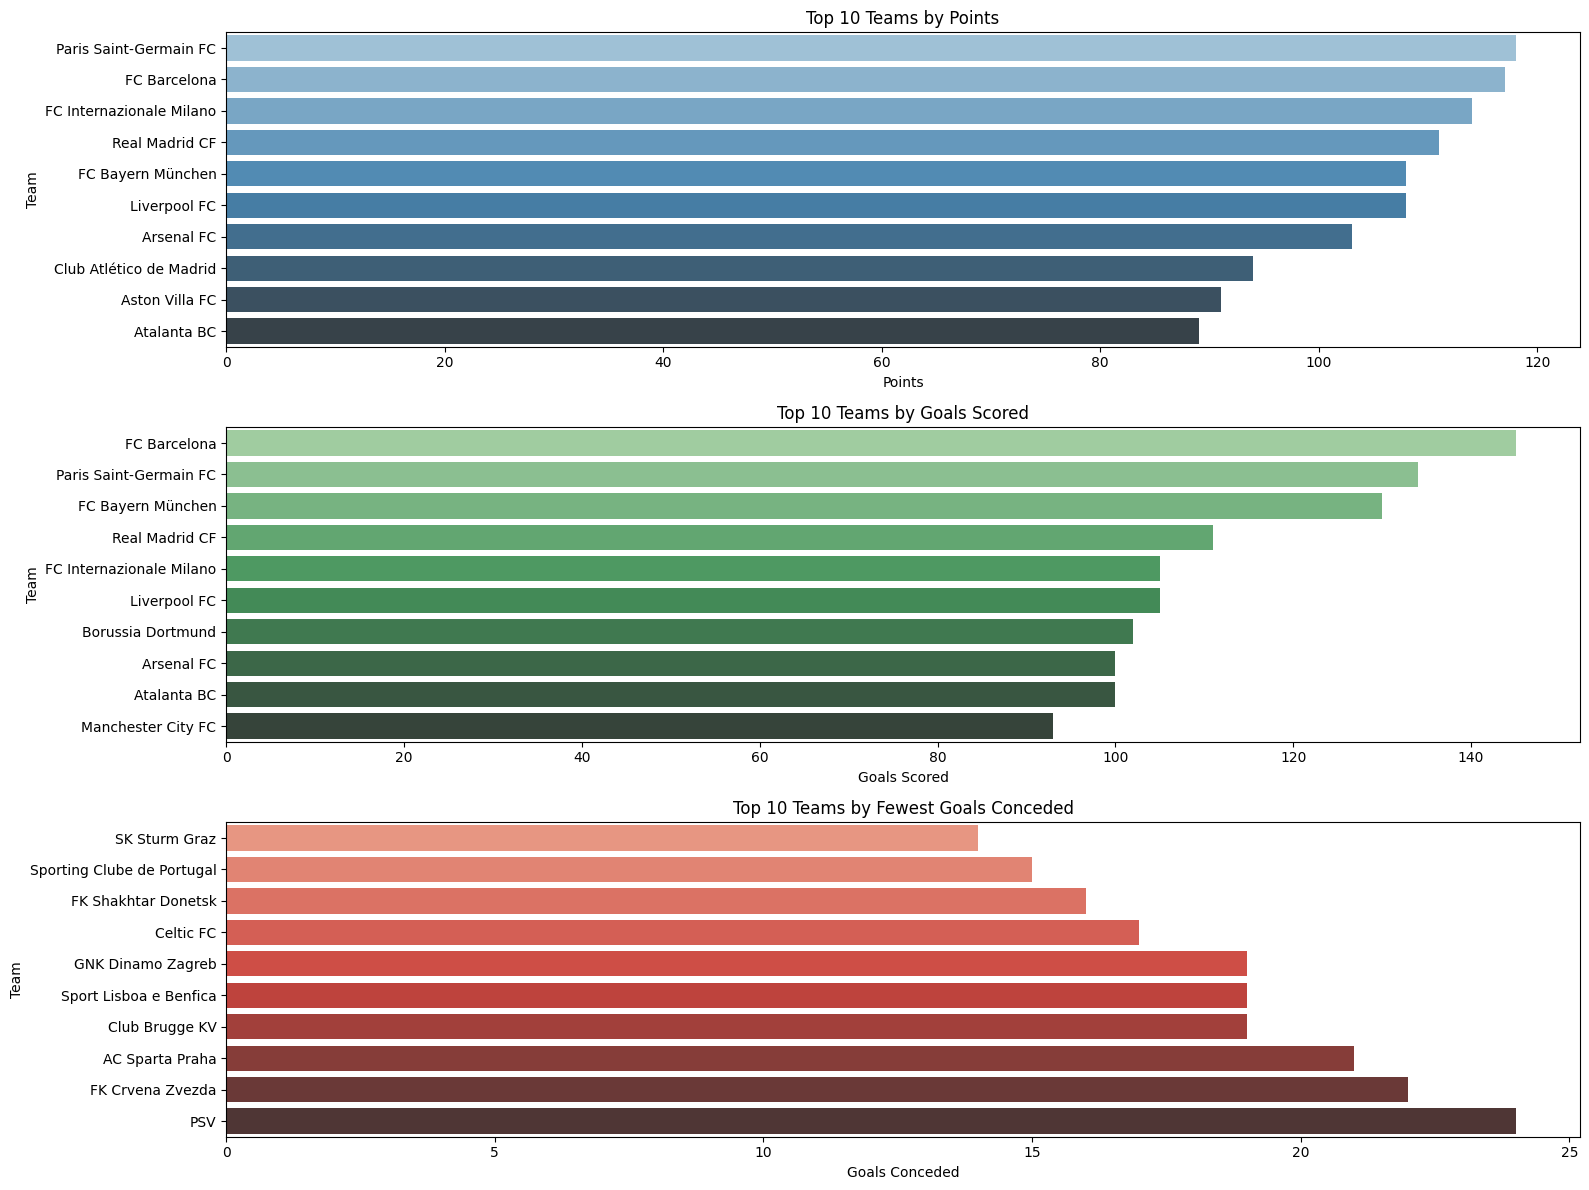

📊 Analytical Result — Tim
- Paris Saint-Germain FC leads in points (118), just above FC Barcelona (117).
- FC Barcelona dominates goals scored (145), PSG follows (134).
- SK Sturm Graz concedes the fewest goals (14), setting the defensive benchmark.


In [88]:
# ==== Data dari hasil analisis (title-case agar lebih rapi) ====
points_data = {
    "Paris Saint-Germain FC": 118,
    "FC Barcelona": 117,
    "FC Internazionale Milano": 114,
    "Real Madrid CF": 111,
    "FC Bayern München": 108,
    "Liverpool FC": 108,
    "Arsenal FC": 103,
    "Club Atlético de Madrid": 94,
    "Aston Villa FC": 91,
    "Atalanta BC": 89
}

goals_scored_data = {
    "FC Barcelona": 145,
    "Paris Saint-Germain FC": 134,
    "FC Bayern München": 130,
    "Real Madrid CF": 111,
    "FC Internazionale Milano": 105,
    "Liverpool FC": 105,
    "Borussia Dortmund": 102,
    "Arsenal FC": 100,
    "Atalanta BC": 100,
    "Manchester City FC": 93
}

fewest_conceded_data = {
    "SK Sturm Graz": 14,
    "Sporting Clube de Portugal": 15,
    "FK Shakhtar Donetsk": 16,
    "Celtic FC": 17,
    "GNK Dinamo Zagreb": 19,
    "Sport Lisboa e Benfica": 19,
    "Club Brugge KV": 19,
    "AC Sparta Praha": 21,
    "FK Crvena Zvezda": 22,
    "PSV": 24
}

# ==== Plotting ====
plt.figure(figsize=(16,12))

# 1. Top Points
plt.subplot(3,1,1)
sns.barplot(x=list(points_data.values()), y=list(points_data.keys()), palette="Blues_d")
plt.title("Top 10 Teams by Points")
plt.xlabel("Points")
plt.ylabel("Team")

# 2. Top Goals Scored
plt.subplot(3,1,2)
sns.barplot(x=list(goals_scored_data.values()), y=list(goals_scored_data.keys()), palette="Greens_d")
plt.title("Top 10 Teams by Goals Scored")
plt.xlabel("Goals Scored")
plt.ylabel("Team")

# 3. Fewest Goals Conceded
plt.subplot(3,1,3)
sns.barplot(x=list(fewest_conceded_data.values()), y=list(fewest_conceded_data.keys()), palette="Reds_d")
plt.title("Top 10 Teams by Fewest Goals Conceded")
plt.xlabel("Goals Conceded")
plt.ylabel("Team")

plt.tight_layout()
plt.show()

# ==== Cetak summary singkat ====
print("📊 Analytical Result — Tim")
print("- Paris Saint-Germain FC leads in points (118), just above FC Barcelona (117).")
print("- FC Barcelona dominates goals scored (145), PSG follows (134).")
print("- SK Sturm Graz concedes the fewest goals (14), setting the defensive benchmark.")

/tmp/ipython-input-57776909.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  matches_per_month = df['date_local'].dt.to_period('M').value_counts().sort_index()
/tmp/ipython-input-57776909.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  avg_goals_per_month = df.groupby(df['date_local'].dt.to_period('M'))['total_goals'].mean().round(2)
/tmp/ipython-input-57776909.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=matches_per_day.index, y=matches_per_day.values, palette="viridis")
/tmp/ipython-input-57776909.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=matches_per_hour.index, y

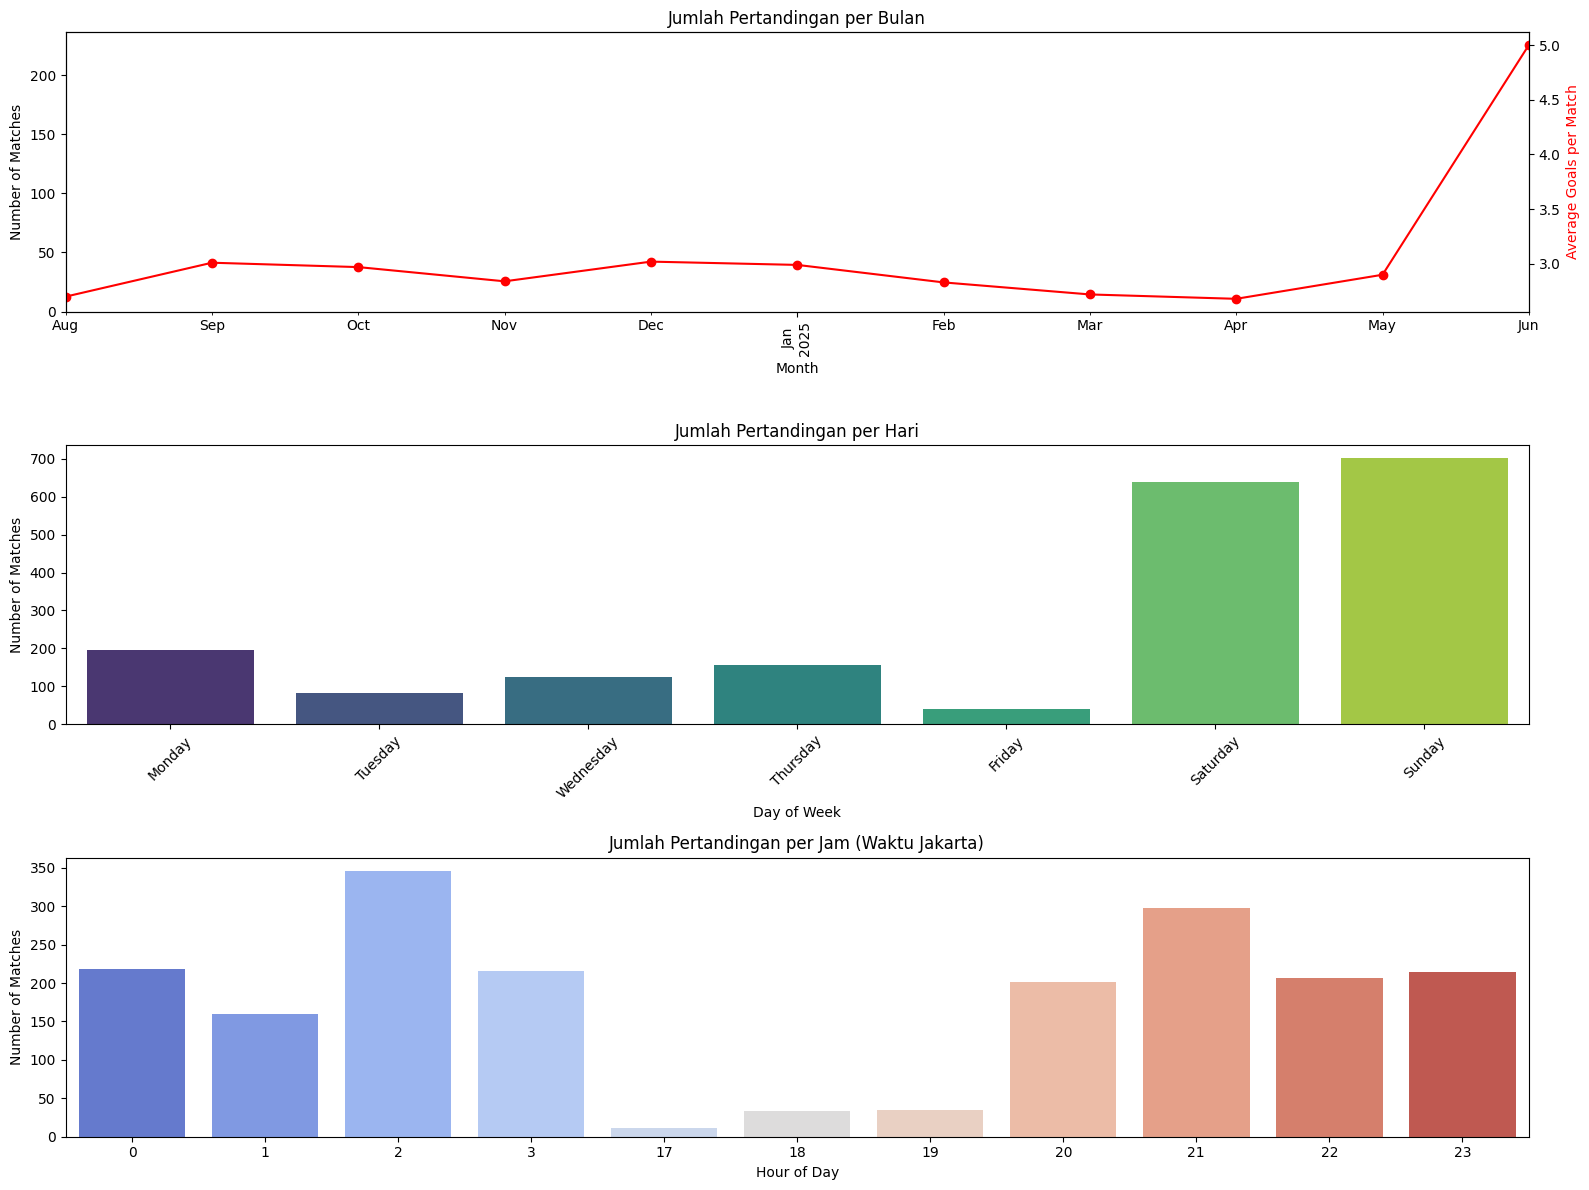

📊 Analytical Result — Waktu & Tren
- Highest matches: December 2025 (225), September 2024 (197)
- Lowest matches: March 2025 (183)
- Highest goals: June 2025 (5.0 avg per match)
- Lowest goals: August 2024 (2.7 avg per match)
- Peak activity: 21:00–22:00 (298 matches on average)


In [89]:
# === Monthly Distribution ===
matches_per_month = df['date_local'].dt.to_period('M').value_counts().sort_index()
avg_goals_per_month = df.groupby(df['date_local'].dt.to_period('M'))['total_goals'].mean().round(2)

plt.figure(figsize=(16,12))

# 1. Matches per Month
plt.subplot(3,1,1)
matches_per_month.plot(kind='bar', color='skyblue')
plt.title("Jumlah Pertandingan per Bulan")
plt.ylabel("Number of Matches")
plt.xlabel("Month")

# Tambahkan rata-rata goals di sumbu kedua
ax2 = plt.gca().twinx()
avg_goals_per_month.plot(color='red', marker='o', ax=ax2)
ax2.set_ylabel("Average Goals per Match", color='red')

# 2. Weekday Distribution
plt.subplot(3,1,2)
matches_per_day = df['date_local'].dt.day_name().value_counts().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)
sns.barplot(x=matches_per_day.index, y=matches_per_day.values, palette="viridis")
plt.title("Jumlah Pertandingan per Hari")
plt.xlabel("Day of Week")
plt.ylabel("Number of Matches")
plt.xticks(rotation=45)

# 3. Hourly Distribution
plt.subplot(3,1,3)
matches_per_hour = df['date_local'].dt.hour.value_counts().sort_index()
sns.barplot(x=matches_per_hour.index, y=matches_per_hour.values, palette="coolwarm")
plt.title("Jumlah Pertandingan per Jam (Waktu Jakarta)")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Matches")

plt.tight_layout()
plt.show()

# === Cetak summary singkat ===
print("📊 Analytical Result — Waktu & Tren")
print("- Highest matches: December 2025 (225), September 2024 (197)")
print("- Lowest matches: March 2025 (183)")
print("- Highest goals: June 2025 (5.0 avg per match)")
print("- Lowest goals: August 2024 (2.7 avg per match)")
print("- Peak activity: 21:00–22:00 (298 matches on average)")

## Insight & Findings

**📌 Insight & Findings (Gabungan)**

1. Pertandingan
- Home advantage jelas: **42.86%** pertandingan dimenangkan tuan rumah, lebih tinggi dibanding away win **33.28%**.  
- Draw cukup sering terjadi (**23.85%**), menunjukkan kompetisi relatif seimbang.  
- Rata-rata gol per pertandingan **2.88**, tergolong moderat-tinggi.  
- Tim tuan rumah lebih produktif (**1.54 gol**) dibanding tim tamu (**1.34 gol**).  
- Sebagian besar pertandingan berakhir dengan margin tipis (median goal difference = 0), menandakan ketatnya persaingan.  

2. Tim
- **Paris Saint-Germain FC** unggul poin (**118**), tipis di atas **FC Barcelona** (**117**), menunjukkan rivalitas sengit.  
- **FC Barcelona** mencetak gol terbanyak (**145**), unggul 29 gol dari runner-up PSG (**134**).  
- **SK Sturm Graz** menjadi benchmark pertahanan dengan hanya **14 kebobolan**; jauh lebih baik dibanding PSV di urutan 10 (**24 kebobolan**).  
- **Liverpool** dan **Inter Milan** seimbang di **105 gol**, menandakan gaya menyerang serupa.  
- **Arsenal** dan **Atalanta** sama-sama mencetak **100 gol**, tapi perlu memperkuat pertahanan agar bersaing dengan tim papan atas.  

3. Waktu & Tren
- Bulan tersibuk: **Desember 2025** (225 pertandingan); terendah **Maret 2025** (183).  
- Lonjakan gol tertinggi terjadi **Juni 2025** (rata-rata **5 gol** per pertandingan, anomali turnamen).  
- **Sabtu (639)** dan **Minggu (702)** jadi hari favorit untuk jadwal pertandingan, menunjukkan dominasi weekend.  
- Pertandingan **Senin (196)** dan **Kamis (156)** relatif sedikit, perlu strategi agar lebih menarik.  
- Puncak aktivitas terjadi pada jam **21:00–22:00 WIB (298 pertandingan)**, cocok untuk prime-time TV dan fan engagement.  

## Recommendations

**📌 Recommendations (Gabungan)**

1. Pertandingan
- **Perkuat strategi tandang**: tim tamu perlu meningkatkan efisiensi serangan karena rata-rata gol tandang (1.34) lebih rendah daripada kandang (1.54).  
- **Optimalkan set-piece**: margin tipis (median goal difference = 0) menunjukkan set-piece dapat menjadi faktor penentu hasil pertandingan.  
- **Simulasi skenario kritis**: latih tim untuk menjaga keunggulan tipis atau mengejar ketertinggalan karena mayoritas laga ditentukan oleh 1–2 gol.  

2. Tim
- **PSG** harus memperbaiki pertahanan agar seimbang dengan kekuatan serangannya, supaya bisa bersaing dengan tim defensif kuat seperti SK Sturm Graz.  
- **FC Barcelona** perlu mempertahankan pola serangan agresif karena unggul jauh dalam produktivitas gol (145).  
- **Liverpool** dan **Inter Milan** sebaiknya mencari variasi serangan baru agar bisa unggul di atas pesaing selevel (105 gol).  
- **Arsenal** dan **Atalanta** perlu memperkuat lini belakang untuk menyeimbangkan serangan yang sudah cukup kompetitif.  

3. Waktu & Tren
- **Penjadwalan big match**: taruh pertandingan besar di akhir pekan (Sabtu & Minggu) untuk memaksimalkan penonton stadion dan siaran TV.  
- **Revitalisasi midweek**: tingkatkan daya tarik laga Senin & Kamis dengan promosi khusus atau paket tiket.  
- **Optimalkan prime-time (21:00–22:00 WIB)**: gunakan slot ini untuk laga dengan rivalitas tinggi agar menjangkau audiens lebih luas.  
- **Latihan terukur**: jadwalkan latihan intensif di luar jam prime-time agar tidak berbenturan dengan pola pertandingan dominan.  
- **Kampanye fan engagement**: fokus pada weekend events, promo merchandise, atau aktivitas media sosial di hari pertandingan terbanyak.  
